In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import librosa

import os
from google.colab import drive

import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Разархивируем данные
!unzip -q '/content/drive/MyDrive/genres.zip'

genres = os.listdir('genres') 

In [ ]:
genres

['disco',
 'country',
 'metal',
 'reggae',
 'jazz',
 'classical',
 'pop',
 'rock',
 'hiphop',
 'blues']

In [ ]:
path = '/content/genres/'

In [ ]:
#Функция возвращает извлеченные из аудиофайла признаки
def get_features(x, sr):
  features=[]
    
  spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(x,sr=sr))
  spectral_centroid = np.mean(librosa.feature.spectral_centroid(x,sr=sr))
  spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(x,sr=sr))
  zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(x))
  rms = np.mean(librosa.feature.rms(x))
  mfcc = librosa.feature.mfcc(x,sr=sr)
  chroma_stft = librosa.feature.chroma_stft(x,sr=sr)

  features.append(spectral_bandwidth)
  features.append(spectral_centroid)
  features.append(spectral_rolloff)
  features.append(zero_crossing_rate)
  features.append(rms)

  for i in mfcc:
    features.append(np.mean(i))

  for i in chroma_stft:
    features.append(np.mean(i))

  return features 

In [ ]:
#Пройдем по всем файлам и извлечем признаки
x_data = []
y = []
for i,genre in enumerate(genres):
  for audio in os.listdir('genres/{}'.format(genre)):
    x, sr = librosa.load(path + '{}/{}'.format(genre,audio),mono=True, duration=30)
    x_data.append(get_features(x, sr))
    y.append(i)


In [ ]:
# #Сохраним выборку на всякий случай
# with open('/content/drive/MyDrive/x_data.pickle', 'wb') as f: 
#   pickle.dump(x_data, f)

# with open('/content/drive/MyDrive/y.pickle', 'wb') as f: 
#   pickle.dump(y, f)

In [ ]:
# with open('/content/drive/MyDrive/x_data.pickle', 'rb') as f:
#   x_data = pickle.load(f)

# with open('/content/drive/MyDrive/y.pickle', 'rb') as f:
#   y = pickle.load(f)

In [ ]:
#Нормируем данные
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

# scaler = MinMaxScaler()
# x_data = scaler.fit_transform(x_data)

In [ ]:
#Разобъем данные на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(np.array(x_data), np.array(y), shuffle=True, stratify=y, test_size=0.1, random_state=56)

In [ ]:
x_train.shape

(900, 6492)

Epoch 1/150
57/57 [==============================] - 1s 5ms/step - loss: 2.3053 - accuracy: 0.2053 - val_loss: 1.8525 - val_accuracy: 0.4600
Epoch 2/150
57/57 [==============================] - 0s 3ms/step - loss: 1.5467 - accuracy: 0.4482 - val_loss: 1.5644 - val_accuracy: 0.6200
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 1.3113 - accuracy: 0.5802 - val_loss: 1.3564 - val_accuracy: 0.6400
Epoch 4/150
57/57 [==============================] - 0s 3ms/step - loss: 1.2255 - accuracy: 0.5771 - val_loss: 1.1963 - val_accuracy: 0.6500
Epoch 5/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0352 - accuracy: 0.6399 - val_loss: 1.1198 - val_accuracy: 0.6700
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 1.0417 - accuracy: 0.6513 - val_loss: 0.9711 - val_accuracy: 0.7100
Epoch 7/150
57/57 [==============================] - 0s 3ms/step - loss: 0.9383 - accuracy: 0.6728 - val_loss: 0.9475 - val_accuracy: 0.6800
Epoch 8/150
5

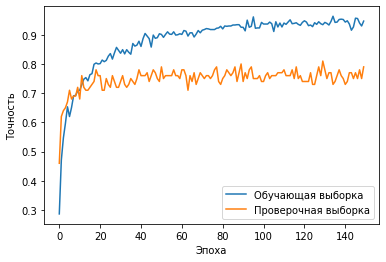

In [ ]:
#попробуем разное сочетание признаков
xx = x_train[:,:-10]
xv = x_test[:,:-10]

#Обучим модель 
model = Sequential()
model.add(Dense(250, activation='relu', input_dim = xx.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(xx, y_train, epochs=150, batch_size=16, validation_data=(xv,y_test))

plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

Epoch 1/20
57/57 [==============================] - 1s 5ms/step - loss: 0.0157 - accuracy: 0.9970 - val_loss: 1.0952 - val_accuracy: 0.7900
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 1.0957 - val_accuracy: 0.7900
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 1.0966 - val_accuracy: 0.7900
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9959 - val_loss: 1.0905 - val_accuracy: 0.7900
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 1.0909 - val_accuracy: 0.7900
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 1.0915 - val_accuracy: 0.7900
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9928 - val_loss: 1.0928 - val_accuracy: 0.7900
Epoch 8/20
57/57 [==

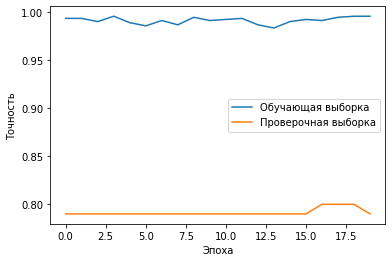

In [ ]:
#Дообучим модель
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
history = model.fit(xx, y_train, epochs=20, batch_size=16, validation_data=(xv,y_test))

plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()